In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import interpolate

In [5]:
X_data = np.array([1.6, 2, 2.5, 3.2, 4, 4.5], dtype="float32")
Y_data = np.array([2  , 8, 14 , 15 , 8, 2], dtype="float32")   # f(x) = y

# target -> f(3)

In [6]:
# orde 1

X = X_data[2:]
Y = Y_data[2:]

def PBH1(x1, y1, x2, y2):
    return (y1 - y2)/(x1 - x2)


def f1(x):
    return b0 + b1*(x - X[0])

b0 = Y[0] 
b1 = PBH1(X[0], Y[0], X[1], Y[1])

f1_x = f1(3)
print(f1_x)

14.714285671710968


In [7]:
# orde 2

X = X_data[2:]
Y = Y_data[2:]

def PBH2(x1, y1, x2, y2, x3, y3):
    return (PBH1(x1, y1, x2, y2)-PBH1(x2, y2, x3, y3))/(x1 - x3)


def f2(x):
    return b0 + b1*(x - X[0]) + b2*(x - X[0])*(x - X[1])


b0 = Y[0] 
b1 = PBH1(X[0], Y[0], X[1], Y[1])
b2 = PBH2(X[0], Y[0], X[1], Y[1], X[2], Y[2])

f2_x = f2(3)
print(f2_x)

15.392857343809965


In [8]:
# orde 3

X = X_data[1:]
Y = Y_data[1:]


def PBH3(x1, y1, x2, y2, x3, y3, x4, y4):
    return (PBH2(x1, y1, x2, y2, x3, y3)-PBH2(x2, y2, x3, y3, x4, y4))/(x1 - x4)


def f3(x):
    return b0 + b1*(x - X[0]) + b2*(x - X[0])*(x - X[1]) + b3*(x - X[0])*(x - X[1])*(x - X[2])


b0 = Y[0]
b1 = PBH1(X[0], Y[0], X[1], Y[1])
b2 = PBH2(X[0], Y[0], X[1], Y[1], X[2], Y[2])
b3 = PBH3(X[0], Y[0], X[1], Y[1], X[2], Y[2], X[3], Y[3])


f3_x = f3(3)
print(f3_x)

15.49404776067962


In [9]:
# orde 4

X = X_data[1:]
Y = Y_data[1:]


def PBH4(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5):
    return (PBH3(x1, y1, x2, y2, x3, y3, x4, y4)-PBH3(x2, y2, x3, y3, x4, y4, x5, y5))/(x1 - x5)


def f4(x):
    return b0 + b1*(x - X[0]) + b2*(x - X[0])*(x - X[1]) + b3*(x - X[0])*(x - X[1])*(x - X[2]) + b4*(x - X[0])*(x - X[1])*(x - X[2])*(x - X[3])


b0 = Y[0]
b1 = PBH1(X[0], Y[0], X[1], Y[1])
b2 = PBH2(X[0], Y[0], X[1], Y[1], X[2], Y[2])
b3 = PBH3(X[0], Y[0], X[1], Y[1], X[2], Y[2], X[3], Y[3])
b4 = PBH4(X[0], Y[0], X[1], Y[1], X[2], Y[2], X[3], Y[3], X[4], Y[4])

f4_x = f4(3)
print(f4_x)

15.539285923611576


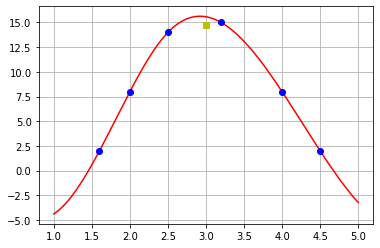

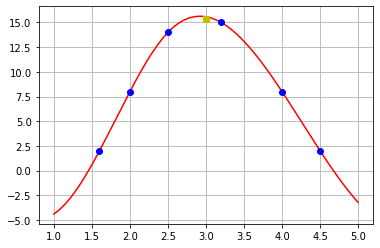

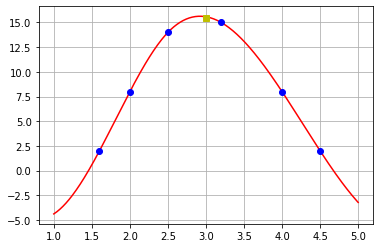

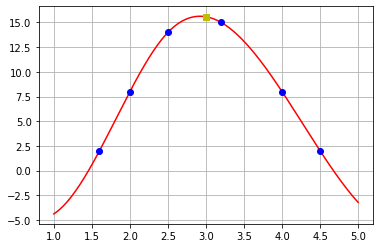

In [11]:
def ShowGraph(X, Y, x, y):
    x_new = np.linspace(1, 5, 300)
    a_BSpline = interpolate.make_interp_spline(X, Y)
    y_new = a_BSpline(x_new)
    
    
    plt.clf()
    plt.plot(x_new, y_new, '-r')
    plt.plot(X, Y, 'ob')
    plt.plot(x, y, 'sy')
    plt.grid()
    plt.show()


ShowGraph(X_data, Y_data, 3, f1_x)
ShowGraph(X_data, Y_data, 3, f2_x)
ShowGraph(X_data, Y_data, 3, f3_x)
ShowGraph(X_data, Y_data, 3, f4_x)